# **Modelling and Evaluation**

## Objectives

* Answer Business Requirement 2:
    * The client is interested in a ML system capable of predicting whether a cherry leaf is healthy or contains powdery mildew.

## Inputs

* inputs/cherry_leaves/cherry-leaves/train
* inputs/cherry_leaves/cherry-leaves/validation
* inputs/cherry_leaves/cherry-leaves/test
* image shape embeddings 

## Outputs

* Image augmentation
* Class indices to change prediction inference in labels
* ML model creation and training
* Learning curve plot for model performance
* Model evaluation on pickle file
* Prediction on random image file

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/milestone-project-mildew-detection-in-cherry-leaves/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/milestone-project-mildew-detection-in-cherry-leaves'

# Set the Input and Output directories

https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/02%20-%20DataVisualization.ipynb

## Set the input directories

Create variables for the data directory path and its subfolders paths 

In [4]:
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/02%20-%20DataVisualization.ipynb

my_data_dir = '/workspace/milestone-project-mildew-detection-in-cherry-leaves/inputs/cherry_leaves/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set the output directories

Create folders and subfolders for storing the results of the research

In [5]:
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/02%20-%20DataVisualization.ipynb

version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


# Import the necessary libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

### Get the Labels in the training set

In [7]:
label_list = os.listdir(train_path)
print(f'Labels: {label_list}')

Labels: ['healthy', 'powdery_mildew']


### Get the image shape embeddings

In [8]:
# https://github.com/SamSswi/WalkthroughProject01DataAnalytics/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(100, 100, 3)

In [9]:
df_freq = joblib.load(filename=f"outputs/{version}/label_dist_freq_df.pkl")
df_freq

,Set,Label,Frequency
0,test,healthy,422
1,test,powdery_mildew,422
2,train,healthy,1472
3,train,powdery_mildew,1472
4,validation,healthy,210
5,validation,powdery_mildew,210


Section 1 content

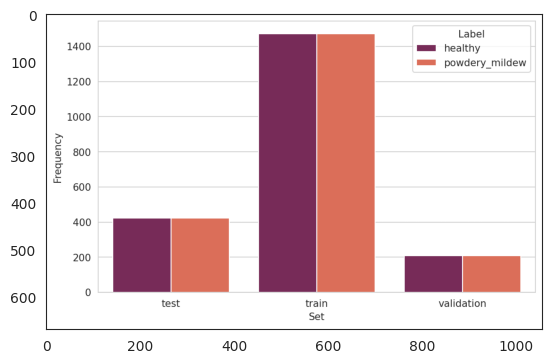

In [10]:
dist_plot = imread(f"outputs/{version}/labels_distribution_plot.png")
plt.imshow(dist_plot)
plt.show()

---

# Image Augmentation

* ### ImageDataGenerator

In [11]:
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-05-28 12:17:59.657856: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


* ### Initialize ImageDataGenerator

In [12]:

augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

* ### Augment the training set

In [15]:

batch_size = 100  # Set batch size, number of samples processed at each iteration
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* ### Augment the validation set images

In [18]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False)

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* ### Augment the test set images

In [19]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False)

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot augmented training image

(100, 100, 100, 3)


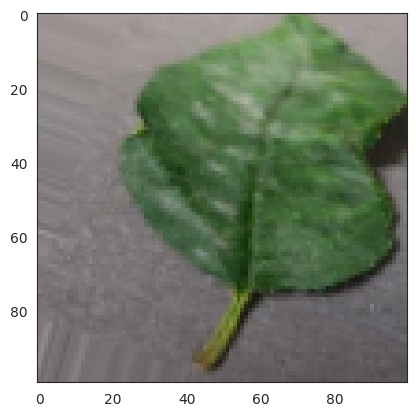

(100, 100, 100, 3)


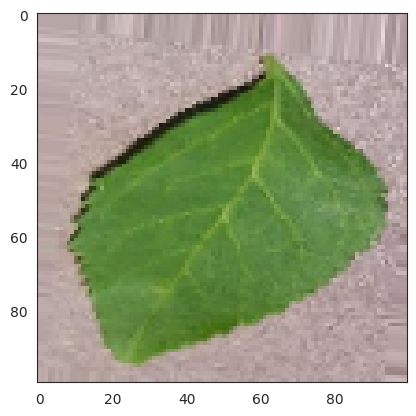

(100, 100, 100, 3)


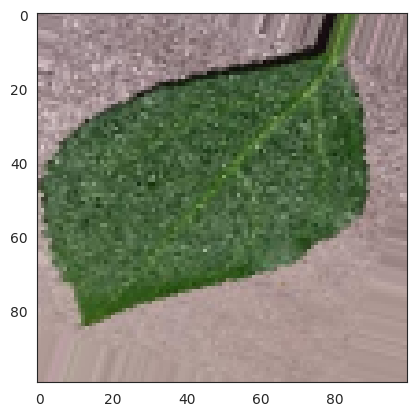

In [30]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Plot augmented validation image

(100, 100, 100, 3)


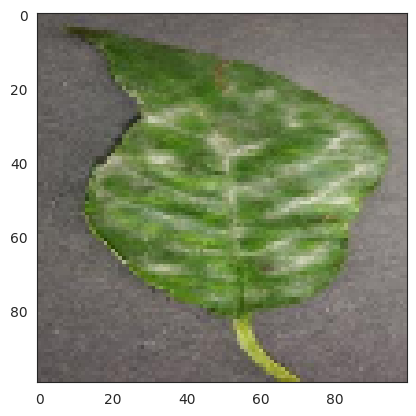

(20, 100, 100, 3)


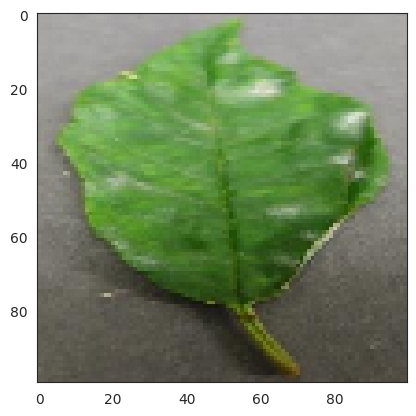

(100, 100, 100, 3)


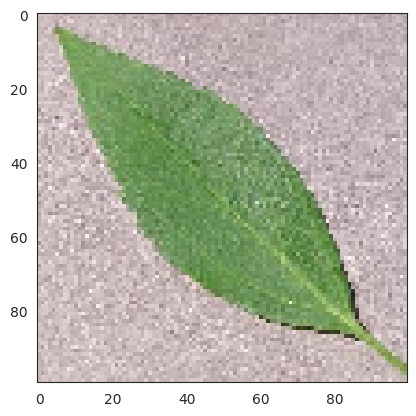

In [25]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Plot augmented test image

(100, 100, 100, 3)


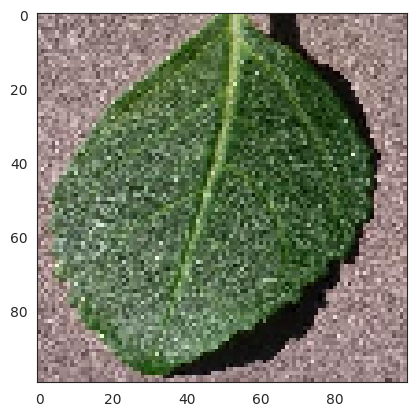

(100, 100, 100, 3)


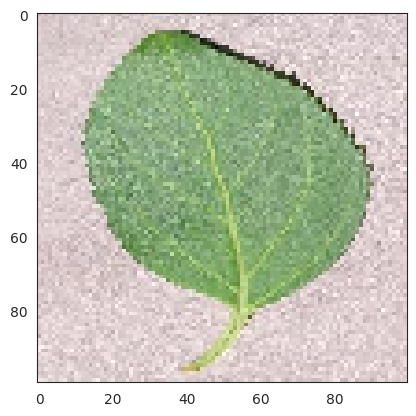

(100, 100, 100, 3)


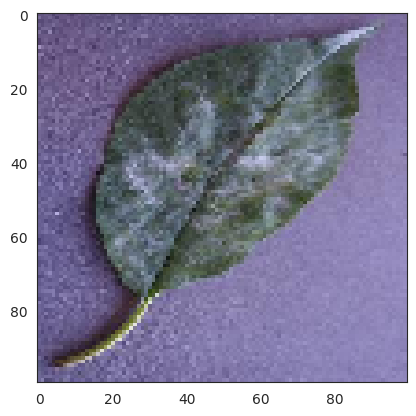

In [24]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Save class_indices

In [26]:
joblib.dump(value=train_set.class_indices, filename=f'{file_path}/class_indices.pkl')

['outputs/v1/class_indices.pkl']

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
